# MSA 410 Customer Analytics: Bass Noise-Robust Estimation Exercise

Guangying Pan 006309837

## Question Q1 Bass Noise-Robust Estimation

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

**1. Estimate "M", "p" and "q" from the adoption series dataset using the linear regression approach described on Slides 8 and 9. From  these values, compute the values of N(t) beyond t=14. Specifically, compute N(30). No writeup necessary, simply state your values of "M", "p", "q" and N(30).**

In [2]:
data =pd.read_excel('adoptionseries2_with_noise.xlsx')

In [3]:
data = data.rename(columns={'N(t)': 'N_t'})
data

,t,N_t
0,1,0.123
1,2,0.097
2,3,0.171
3,4,0.145
4,5,0.238
5,6,0.214
6,7,0.333
7,8,0.314
8,9,0.466
9,10,0.455


In [4]:
data['A'] = 0
data['A^2'] = 0

for i in range(1, data.shape[0]):
    data.iloc[i, 2] = data.iloc[i - 1, 2] + data.iloc[i - 1, 1]
    data.iloc[i, 3] = data.iloc[i, 2] ** 2
    
data

,t,N_t,A,A^2
0,1,0.123,0.000,0.000000
1,2,0.097,0.123,0.015129
2,3,0.171,0.220,0.048400
3,4,0.145,0.391,0.152881
4,5,0.238,0.536,0.287296
5,6,0.214,0.774,0.599076
6,7,0.333,0.988,0.976144
7,8,0.314,1.321,1.745041
8,9,0.466,1.635,2.673225
9,10,0.455,2.101,4.414201


In [5]:
linear_reg  = smf.ols(formula = 'N_t ~ A + I(A**2)', data = data)
result = linear_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    N_t   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     188.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.09e-09
Time:                        01:33:23   Log-Likelihood:                 23.404
No. Observations:                  14   AIC:                            -40.81
Df Residuals:                      11   BIC:                            -38.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0961      0.027      3.611      0.0

/Users/elenapan/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
a = result.params['Intercept']
b = result.params['A']
c = result.params['I(A ** 2)']

print(f"intercept: {a}")
print(f"coef_A: {b}")
print(f"coef_A_squared: {c}")

intercept: 0.09607195064567359
coef_A: 0.21130507784777675
coef_A_squared: -0.006222908592151068


In [7]:
p = (np.sqrt(b**2-4*a*c)-b)/2
q = (np.sqrt(b**2-4*a*c)+b)/2
M = -q/c

print(f"p: {p:.3g}")
print(f"q: {q:.3g}")
print(f"M: {M:.3g}")

p: 0.00279
q: 0.214
M: 34.4


In [8]:
data_q1 = data.copy()

for i in range(14, 30):
    data_q1.loc[i] = 0
    data_q1.iloc[i, 0] = i + 1
    data_q1.iloc[i, 2] = data_q1.iloc[i - 1, 2] + data_q1.iloc[i - 1, 1]
    data_q1.iloc[i, 3] = data_q1.iloc[i, 2] ** 2
    data_q1.iloc[i, 1] = a + b * data_q1.iloc[i, 2] + c * data_q1.iloc[i, 3]

data_q1

,t,N_t,A,A^2
0,1,0.123000,0.000000,0.000000
1,2,0.097000,0.123000,0.015129
2,3,0.171000,0.220000,0.048400
3,4,0.145000,0.391000,0.152881
4,5,0.238000,0.536000,0.287296
5,6,0.214000,0.774000,0.599076
6,7,0.333000,0.988000,0.976144
7,8,0.314000,1.321000,1.745041
8,9,0.466000,1.635000,2.673225
9,10,0.455000,2.101000,4.414201


In [9]:
print(f"N(30): {data_q1.iloc[29, 1]:.3g}")

N(30): 0.974


### 

**2. Assume M is fixed at M=100. Estimate "p" and "q" from the adoption series dataset from period 1 to 14 using the nonlinear regression approach, again based on the formula at the top of slide 8. See Question Q4 below for comments on what makes the model nonlinear when M is fixed, but linear when M is not fixed (as in Q1.1 above).   No writeup necessary, simply state your values of "p", "q" .**

In [10]:
from scipy.optimize import curve_fit

In [11]:
def model_func(A, p, q):
    M = 100
    return M * p + (q - p) * A - (q / M) * A ** 2 

params, covariance = curve_fit(model_func, data['A'], data['N_t'], p0 = [0.02, 0.5])
p, q = params

print(f"p = {p:.3g}, q = {q:.3g}")

p = 0.00106, q = 0.194


### 

**3. Using M=100 and the estimated values of "p" and "q" from Step 2 above, forecast into the future beyond period 14. Compute the value of N(30). No writeup necessary. Simply state the N(30) value that you got.**

In [12]:
data_q2 = data.copy()

for i in range(14, 30):
    data_q2.loc[i] = 0
    data_q2.iloc[i, 0] = i + 1
    data_q2.iloc[i, 2] = data_q2.iloc[i - 1, 2] + data_q2.iloc[i - 1, 1]
    data_q2.iloc[i, 3] = data_q2.iloc[i, 2] ** 2
    data_q2.iloc[i, 1] = model_func(data_q2.iloc[i, 2], p,q)

data_q2

,t,N_t,A,A^2
0,1,0.123000,0.000000,0.000000
1,2,0.097000,0.123000,0.015129
2,3,0.171000,0.220000,0.048400
3,4,0.145000,0.391000,0.152881
4,5,0.238000,0.536000,0.287296
5,6,0.214000,0.774000,0.599076
6,7,0.333000,0.988000,0.976144
7,8,0.314000,1.321000,1.745041
8,9,0.466000,1.635000,2.673225
9,10,0.455000,2.101000,4.414201


In [13]:
print(f"N(30): {data_q2.iloc[29, 1]:.3g}")

N(30): 4.89


### 

**4. Continue to assume M=100. Estimate "p" and "q" from the adoption series from period 1 to 14, this time using the Continuous Bass Model of  Slide 21.  You can do this via nonlinear regression in python creating a formula based on the expression at the bottom of Slide 21. [Alternatively you can set up an optimization calculation to minimize the Sum of Squared Errors(SSE), like on Slides 23-25, shown in the spreadsheet adoptionseries1_continuous_bass_solved.xls. In this spreadsheet if we start with p=0.001, q=0.5, M=100 (the values you see when you see when you open the spreadsheet), and run SOLVER to optimize for p,q,M, then we get estimates as p=0.000596, q=0.418653, M=123.4005.] For this HW question, because M is already assumed to be M=100, we optimize  for only p and q,  fixing M at 100. Use your estimated values of p and q to estimate the value of N(30) under the Continuous Bass Model. No writeup necessary. Simply state your values of p, q, and N(30).**

In [14]:
def model_func2(t, p, q):
    M = 100
    return M * (1 - np.exp(-(p+q)*t))/(1 + q/p*np.exp(-(p+q)*t)) - M * (1 - np.exp(-(p+q)*(t-1)))/(1 + q/p*np.exp(-(p+q)*(t-1)))

params, covariance = curve_fit(model_func2, data['t'], data['N_t'], p0 = [0.02, 0.5])
p, q = params

print(f"p = {p:.3g}, q = {q:.3g}")

p = 0.000955, q = 0.179


In [15]:
data_q3 = data.copy()

for i in range(14, 30):
    data_q3.loc[i] = 0
    data_q3.iloc[i, 0] = i + 1
    data_q3.iloc[i, 2] = data_q3.iloc[i - 1, 2] + data_q3.iloc[i - 1, 1]
    data_q3.iloc[i, 3] = data_q3.iloc[i, 2] ** 2
    data_q3.iloc[i, 1] = model_func2(data_q3.iloc[i, 0], p,q)

data_q3

,t,N_t,A,A^2
0,1,0.123000,0.000000,0.000000
1,2,0.097000,0.123000,0.015129
2,3,0.171000,0.220000,0.048400
3,4,0.145000,0.391000,0.152881
4,5,0.238000,0.536000,0.287296
5,6,0.214000,0.774000,0.599076
6,7,0.333000,0.988000,0.976144
7,8,0.314000,1.321000,1.745041
8,9,0.466000,1.635000,2.673225
9,10,0.455000,2.101000,4.414201


In [16]:
print(f"N(30): {data_q3.iloc[29, 1]:.3g}")

N(30): 4.5


## Question Q2

**Consider M to be 100. Plot the N(t) curve as specified by the Bass Model for a broad range of value pairs for p and q, with p ranging from 0.005 to 0.08 and  q ranging from 0.1 to 0.8. Use the Discrete Bass model for this because it is simpler and leads to the same qualitative conclusions for this question as the Continuous Bass.  From these plots, make some summary observations on how the absolute and relative values of p and q influence different  aspects of the N(t) curve , like the shape, height, slope and decay duration. The motivation for this question is that if you know how p and q affect the shape of the curve, then this should allow you, by reverse-logic, to guess the value of p and q if you see the shape of the curve. Make sure you scale the plots the same way so that comparisons are easy to make. In your submitted response,  reproduce some of your plots to illustrate your summary observations. You will probably generate many plots to get an understanding of how p and q affect the N(t) curve. You definitely do not have to reproduce all of those plots in your submission, just enough to illustrate your summary observations.**

In [17]:
p_values = np.linspace(0.005, 0.08, 4)
q_values = np.linspace(0.1, 0.8, 4)

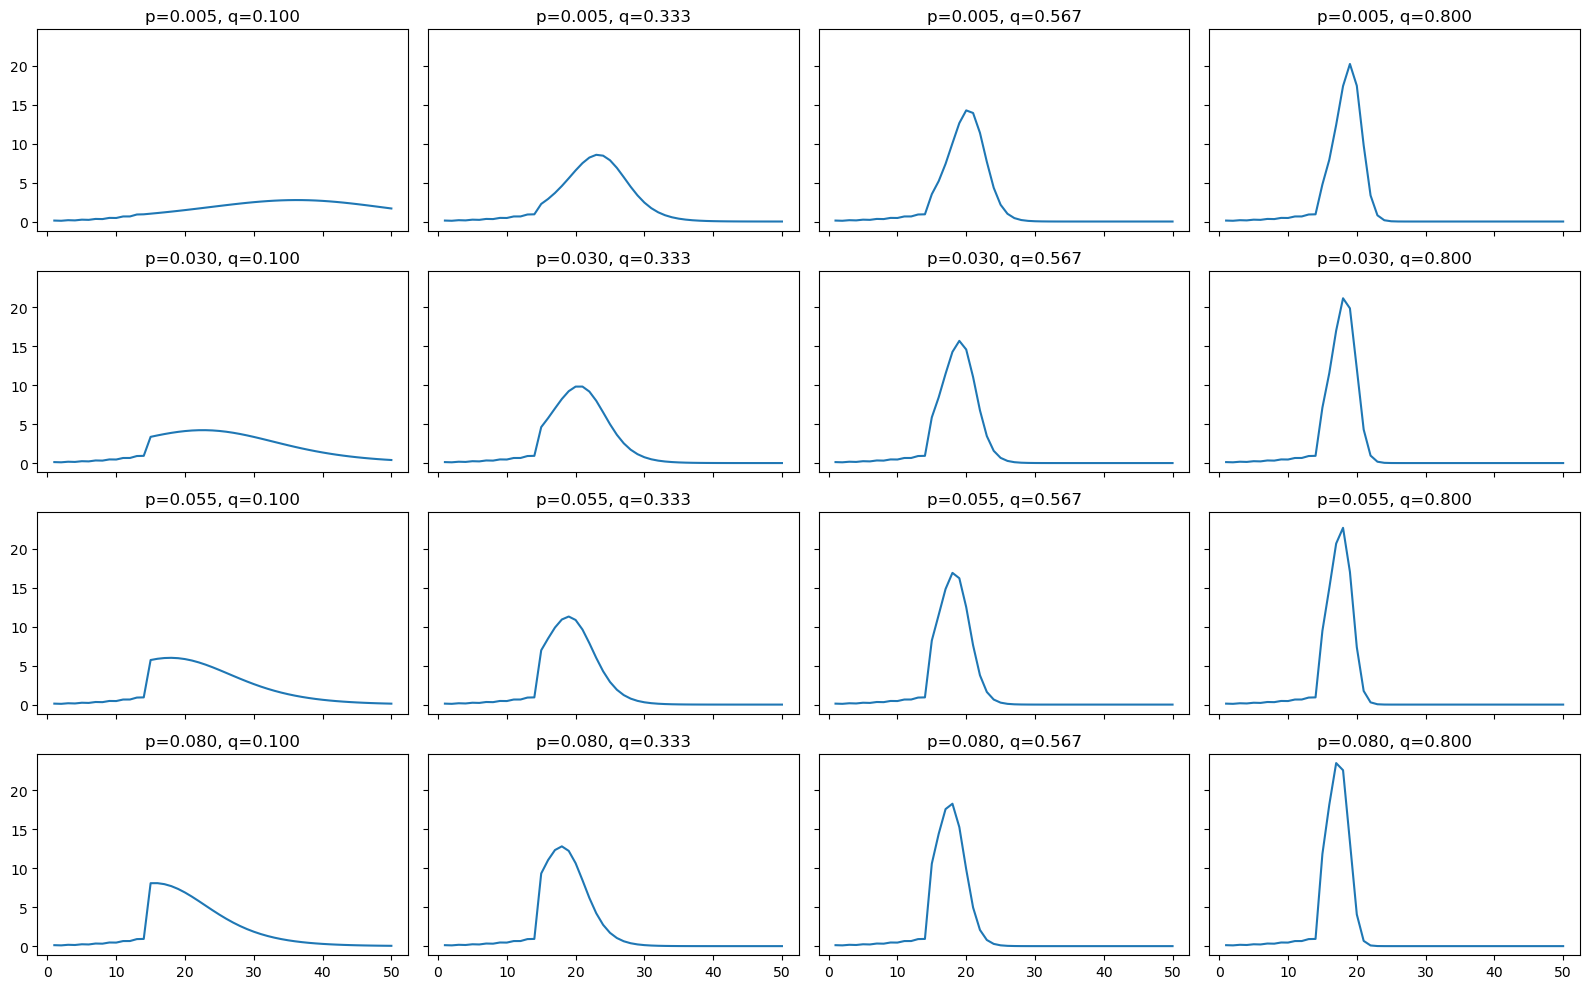

In [18]:
n_rows = len(p_values)
n_cols = len(q_values)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 10), sharex=True, sharey=True)


for k, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        data_q4 = data.copy()
        for i in range(14, 50):
            data_q4.loc[i] = 0
            data_q4.iloc[i, 0] = i + 1
            data_q4.iloc[i, 2] = data_q4.iloc[i - 1, 2] + data_q4.iloc[i - 1, 1]
            data_q4.iloc[i, 3] = data_q4.iloc[i, 2] ** 2
            data_q4.iloc[i, 1] = model_func(data_q4.iloc[i, 2], p, q)
        
        ax = axs[k, j]
        ax.plot(data_q4.iloc[:, 0], data_q4.iloc[:, 1])
        ax.set_title(f'p={p:.3f}, q={q:.3f}')

# Add a big shared xlabel and ylabel
plt.tight_layout()
plt.show()


In all the above graphs, p is smaller than q, which shows that the curve starts near zero, indicating no new adopters at the beginning, possibly due to high risk or costly trials. As the p value increases, the curve rises more quickly, suggesting that a higher rate of innovation leads to earlier adoption. Conversely, when the q value increases, the curve exhibits a sharper peak or a steeper slope, signifying that a strong effect of imitation leads to more rapid adoption. Overall, larger p and q values result in an earlier peak, and the decay duration after the peak is mainly influenced by q; after reaching the peak, the number of new adopters decreases sharply, and eventually, there are no more new adopters.

## Question 3

**Comparing Slides 12,13 with Slides 14,15, we see that the estimation error of M is larger  in the first case than in the second case, and consequently the forecasted curve beyond period 15 is much further from the true curve in the first case than in the second case.  What differences in the two time series or the nature of the noise (up to period 15) lead to the difference  described in the previous sentence? The main point of this question is not to tie you specifically to the examples on the slides but to make you think more broadly about the situations in the data or problem that lead to M being estimated poorly.  If you want, you can experiment with different values of p,q, different levels of noise and compare the forecasted curve with noise with the forecasted curve without noise as slides 14 and 16 do, or compute the magnitude of error in the estimated value of M.  This question is open ended, with a response ranging from 2 sentences to 3 pages. Points  will be accrued in proportion to the depth of analysis.**

### situation 1: p1 = 0.005, q1= 0.8, M1 = 100

In [39]:
# true value
p1, q1, M1 = 0.005, 0.8, 100

data_q5 = data.copy()

for i in range(14, 50):
    data_q5.loc[i] = 0
    data_q5.iloc[i, 0] = i + 1
    data_q5.iloc[i, 2] = data_q5.iloc[i - 1, 2] + data_q5.iloc[i - 1, 1]
    data_q5.iloc[i, 3] = data_q5.iloc[i, 2] ** 2
    data_q5.iloc[i, 1] = M1 * p1 + (q1 - p1) * data_q5.iloc[i, 2] - (q1/M1) * data_q5.iloc[i, 3]

N_true_1 = data_q5

In [40]:
# add noise
data_noisy_1 = data[['t', 'N_t']].copy()

noise_level = 0.1
noise = np.random.uniform(-noise_level, noise_level, size=len(data_noisy_1))

data_noisy_1['N_t_noisy'] = data_noisy_1['N_t'] * (1 + noise)
data_noisy_1 = data_noisy_1.drop('N_t', axis = 1)

# calculate pqM
data_noisy_1['A'] = 0
data_noisy_1['A^2'] = 0

for i in range(1, data_noisy_1.shape[0]):
    data_noisy_1.iloc[i, 2] = data_noisy_1.iloc[i - 1, 2] + data_noisy_1.iloc[i - 1, 1]
    data_noisy_1.iloc[i, 3] = data_noisy_1.iloc[i, 2] ** 2
    
linear_reg_noise1  = smf.ols(formula = 'N_t_noisy ~ A + I(A**2)', data = data_noisy_1)
result = linear_reg_noise1.fit()
# print(result.summary())

a = result.params['Intercept']
b = result.params['A']
c = result.params['I(A ** 2)']

p = (np.sqrt(b**2-4*a*c)-b)/2
q = (np.sqrt(b**2-4*a*c)+b)/2
M = -q/c

print(f"p: {p:.3g}")
print(f"q: {q:.3g}")
print(f"M: {M:.3g}")

p: 0.00361
q: 0.22
M: 26.8


In [41]:
# noisy value

data_q6 = data_noisy_1.copy()

for i in range(14, 50):
    data_q6.loc[i] = 0
    data_q6.iloc[i, 0] = i + 1
    data_q6.iloc[i, 2] = data_q6.iloc[i - 1, 2] + data_q6.iloc[i - 1, 1]
    data_q6.iloc[i, 3] = data_q6.iloc[i, 2] ** 2
    data_q6.iloc[i, 1] = a + b * data_q6.iloc[i, 2] + c * data_q6.iloc[i, 3]

# data_q6
N_noise_1 = data_q6

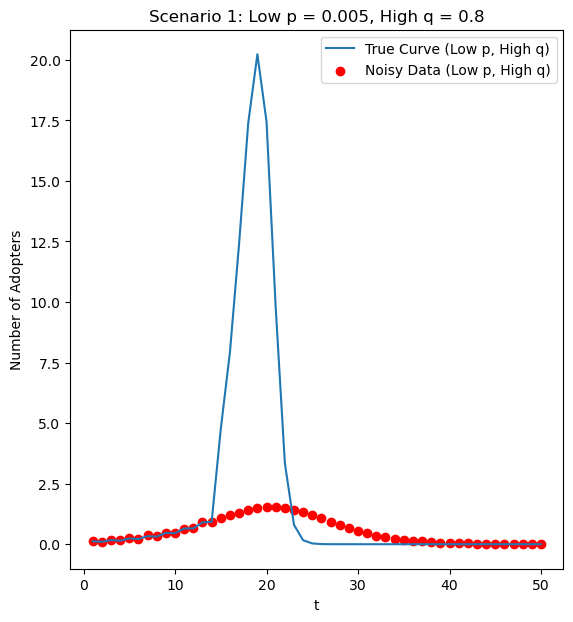

In [42]:
plt.figure(figsize=(14, 7))

# Scenario 1
plt.subplot(1, 2, 1)
plt.plot(N_true_1['t'], N_true_1['N_t'], label="True Curve (Low p, High q)")
plt.scatter(N_noise_1['t'], N_noise_1['N_t_noisy'], color='red', label="Noisy Data (Low p, High q)")
plt.xlabel("t")
plt.ylabel("Number of Adopters")
plt.title("Scenario 1: Low p = 0.005, High q = 0.8")
plt.legend()

### situation 2: p2 = 0.08, q2 = 0.1, M2 = 100

In [23]:
# true value
p2, q2, M2 = 0.08, 0.1, 100

data_q7 = data.copy()

for i in range(14, 50):
    data_q7.loc[i] = 0
    data_q7.iloc[i, 0] = i + 1
    data_q7.iloc[i, 2] = data_q7.iloc[i - 1, 2] + data_q7.iloc[i - 1, 1]
    data_q7.iloc[i, 3] = data_q7.iloc[i, 2] ** 2
    data_q7.iloc[i, 1] = M2 * p2 + (q2 - p2) * data_q7.iloc[i, 2] - (q2/M2) * data_q7.iloc[i, 3]

N_true_2 = data_q7

In [24]:
# add noise
data_noisy_2 = data[['t', 'N_t']].copy()

noise_level = 0.1
noise = np.random.uniform(-noise_level, noise_level, size=len(data_noisy_1))

data_noisy_2['N_t_noisy'] = data_noisy_2['N_t'] * (1 + noise)
data_noisy_2 = data_noisy_2.drop('N_t', axis = 1)

# calculate pqM
data_noisy_2['A'] = 0
data_noisy_2['A^2'] = 0

for i in range(1, data_noisy_2.shape[0]):
    data_noisy_2.iloc[i, 2] = data_noisy_2.iloc[i - 1, 2] + data_noisy_2.iloc[i - 1, 1]
    data_noisy_2.iloc[i, 3] = data_noisy_2.iloc[i, 2] ** 2
    
linear_reg_noise2  = smf.ols(formula = 'N_t_noisy ~ A + I(A**2)', data = data_noisy_2)
result = linear_reg_noise2.fit()
# print(result.summary())

a = result.params['Intercept']
b = result.params['A']
c = result.params['I(A ** 2)']

p = (np.sqrt(b**2-4*a*c)-b)/2
q = (np.sqrt(b**2-4*a*c)+b)/2
M = -q/c

print(f"p: {p:.3g}")
print(f"q: {q:.3g}")
print(f"M: {M:.3g}")

p: 0.00188
q: 0.203
M: 54.3


In [25]:
# noisy value

data_q8 = data_noisy_2.copy()

for i in range(14, 50):
    data_q8.loc[i] = 0
    data_q8.iloc[i, 0] = i + 1
    data_q8.iloc[i, 2] = data_q8.iloc[i - 1, 2] + data_q8.iloc[i - 1, 1]
    data_q8.iloc[i, 3] = data_q8.iloc[i, 2] ** 2
    data_q8.iloc[i, 1] = a + b * data_q8.iloc[i, 2] + c * data_q8.iloc[i, 3]

# data_q6
N_noise_2 = data_q8

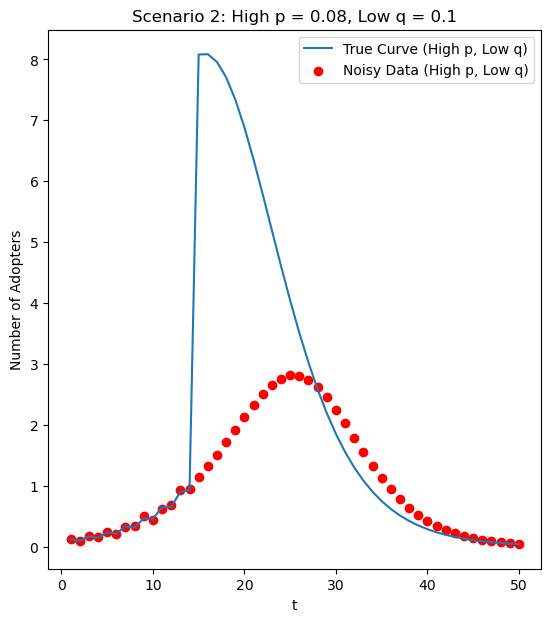

In [26]:
plt.figure(figsize=(14, 7))

# Scenario 2
plt.subplot(1, 2, 1)
plt.plot(N_true_2['t'], N_true_2['N_t'], label="True Curve (High p, Low q)")
plt.scatter(N_noise_2['t'], N_noise_2['N_t_noisy'], color='red', label="Noisy Data (High p, Low q)")
plt.xlabel("t")
plt.ylabel("Number of Adopters")
plt.title("Scenario 2: High p = 0.08, Low q = 0.1")
plt.legend()

## Question 4

**A model is a linear regression model when the number of predictors (including the constant column of 1s) is equal to the number of parameters to be estimated and there is a one-to-one mapping between the coefficients and the parameters to be estimated. If this condition fails to hold then it is a nonlinear regression. Linear regression does not necessarily mean that the plot between X and expected Y looks like a straight line.  In the equation N(t) = Mp + (q-p)A(t) - (q/M)A^2(t), if M is not fixed then there are three parameters (p,q,M) and three predictors including the intercept, and also there is a  one-to-one mapping, so this is a linear regression. In that same equation, if M is fixed then there are only two parameters and still three predictors, and so it becomes a nonlinear regression. Note, however, that in some cases, it is possible to modify the expression in a nonlinear regression situation to bring it to a linear regression situation, and indeed that modification is possible in the case of N(t) = Mp + (q-p)A(t) - (q/M)A^2(t) with M fixed as we do in Question Q1.2. What is that modification? Another way to ask this question: What are the predictors you will use in the post-modification linear regression? How do you get the values of p and q from the coefficients of this linear regression? Run the corresponding linear regression and verify that you get the same p and q values as in Question Q1.2. This question is about the discrete Bass and not continuous Bass.**

In [27]:
data_q9 = data.copy()

M = 100
data_q9['A_2_M'] = data_q9['A^2'] / M

data_q9

,t,N_t,A,A^2,A_2_M
0,1,0.123,0.000,0.000000,0.000000
1,2,0.097,0.123,0.015129,0.000151
2,3,0.171,0.220,0.048400,0.000484
3,4,0.145,0.391,0.152881,0.001529
4,5,0.238,0.536,0.287296,0.002873
5,6,0.214,0.774,0.599076,0.005991
6,7,0.333,0.988,0.976144,0.009761
7,8,0.314,1.321,1.745041,0.017450
8,9,0.466,1.635,2.673225,0.026732
9,10,0.455,2.101,4.414201,0.044142


In [28]:
linear_reg_3  = smf.ols(formula = 'N_t ~ A + A_2_M', data = data_q9)
result = linear_reg_3.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    N_t   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     188.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.09e-09
Time:                        01:33:25   Log-Likelihood:                 23.404
No. Observations:                  14   AIC:                            -40.81
Df Residuals:                      11   BIC:                            -38.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0961      0.027      3.611      0.0

/Users/elenapan/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
a = result.params['Intercept']
b = result.params['A']
c = result.params['A_2_M']

p = a / M
q = b + p  
q_M = -c  

q, q_M, np.isclose(q, q_M)

(0.21226579735423332, 0.6222908592151059, False)

In [30]:
p

0.0009607195064567392

In [31]:
#######################################################################################################

## Question 5

**For as many of the questions Q1 through Q4 above that you attempted, use a generative AI tool to produce python or R code. The code should be able to solve the HW problem exactly, it should not be code that solves some different, though related, problem. For each question, submit the following: (A) The prompt or sequence of prompts that you entered into the generative tool, (B) an identification of which sequence of prompts was entered into which  generative tool (like ChatGPT, Bing Chat, Bard, GitHub Copilot), (C) generative tool's  output from each prompt, identifying which output corresponds to which prompt and which generative tool.**

### Question 1 ChatGPT

Paste all the prompts into the ChatGPT 4.0 with the Excel file, and below is the output:

1. Estimate "M", "p" and "q" from the adoption series dataset using the linear regression approach described on Slides 8 and 9. From  these values, compute the values of N(t) beyond t=14. Specifically, compute N(30). No writeup necessary, simply state your values of "M", "p", "q" and N(30).

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_excel("adoptionseries2_with_noise.xlsx")

# Display the first few rows of the dataset to understand its structure
df.head()

from scipy.optimize import curve_fit
import numpy as np

# Define the cumulative function according to the Bass model
def cumulative_bass_model(t, M, p, q):
    """
    Cumulative adopters function of the Bass model.
    """
    part1 = (1 - np.exp(-(p + q) * t))
    part2 = 1 + q / p * np.exp(-(p + q) * t)
    return M * part1 / part2

# Compute cumulative adopters
df['N_cumulative'] = df['N(t)'].cumsum()

# Initial guesses for M, p, and q
M_guess = df['N_cumulative'].iloc[-1]  # Assume final cumulative value as initial M
p_guess = 0.03  # Typical starting value for p
q_guess = 0.38  # Typical starting value for q

# Fit the model
params, cov = curve_fit(cumulative_bass_model, df['t'], df['N_cumulative'], p0=[M_guess, p_guess, q_guess])

# Extract fitted M, p, and q
M_fitted, p_fitted, q_fitted = params

# Linear regression approach for estimating M, p, and q
# The linear form of the Bass model as presented in slides for estimation:
# Adoption at time t, N(t), is related to the parameters and the cumulative adopters until time t-1

# Transform the data for linear regression
df['t-1'] = df['t'] - 1
df['N(t-1)'] = df['N(t)'].shift(1).fillna(0)
df['N_cumulative_t-1'] = df['N(t-1)'].cumsum()
df['Fraction'] = (df['N(t)'] / (M_fitted - df['N_cumulative_t-1']))

# The linear regression model can be applied to the transformed variables to estimate p and q
X = df[['N_cumulative_t-1', 't-1']]
y = df['Fraction']

# Using np.linalg.lstsq for linear regression
X = np.column_stack((X, np.ones(len(X))))
theta = np.linalg.lstsq(X, y, rcond=None)[0]

# Extracting p and q from the regression coefficients
p_estimated, q_estimated = theta[:-1]

# Now, let's calculate N(30) using the estimated M, p, and q.
# For this, we need the cumulative adoption until t=29, which we can calculate using the Bass model,
# and then find N(30) as the difference between cumulative adoptions at t=30 and t=29.

# Cumulative adoption until t=29
N_cumulative_29 = cumulative_bass_model(29, M_fitted, p_estimated, q_estimated)

# Cumulative adoption at t=30
N_cumulative_30 = cumulative_bass_model(30, M_fitted, p_estimated, q_estimated)

# N(30) as the difference
N_30 = N_cumulative_30 - N_cumulative_29

M_fitted, p_estimated, q_estimated, N_30

(95.38201444565208,
 0.001888434061345451,
 5.459200858812818e-05,
 0.1706221823858991)

2. Assume M is fixed at M=100. Estimate "p" and "q" from the adoption series dataset from period 1 to 14 using the nonlinear regression approach, again based on the formula at the top of slide 8. See Question Q4 below for comments on what makes the model nonlinear when M is fixed, but linear when M is not fixed (as in Q1.1 above).   No writeup necessary, simply state your values of "p", "q" . 

In [33]:
# M is fixed
M_fixed = 100

# Define the cumulative function with M fixed
def cumulative_bass_model_fixed_M(t, p, q):
    """
    Cumulative adopters function of the Bass model with fixed M.
    """
    part1 = (1 - np.exp(-(p + q) * t))
    part2 = 1 + q / p * np.exp(-(p + q) * t)
    return M_fixed * part1 / part2

# We'll estimate "p" and "q" using data from periods 1 to 14
df_subset = df[df['t'] <= 14]

# Initial guesses for p and q (since M is fixed)
p_guess = 0.03  # Typical starting value for p
q_guess = 0.38  # Typical starting value for q

# Fit the model to the subset of data
params_fixed_M, cov_fixed_M = curve_fit(cumulative_bass_model_fixed_M, df_subset['t'], df_subset['N_cumulative'], p0=[p_guess, q_guess])

# Extract fitted p and q with M fixed
p_fitted_fixed_M, q_fitted_fixed_M = params_fixed_M

p_fitted_fixed_M, q_fitted_fixed_M

(0.0009334623814497431, 0.18115540041797834)

3. Using M=100 and the estimated values of "p" and "q" from Step 2 above, forecast into the future beyond period 14. Compute the value of N(30). No writeup necessary. Simply state the N(30) value that you got. 

In [34]:
N_cumulative_29_fixed_M = cumulative_bass_model_fixed_M(29, p_fitted_fixed_M, q_fitted_fixed_M)
N_cumulative_30_fixed_M = cumulative_bass_model_fixed_M(30, p_fitted_fixed_M, q_fitted_fixed_M)

# N(30) as the difference
N_30_fixed_M = N_cumulative_30_fixed_M - N_cumulative_29_fixed_M

N_30_fixed_M

4.5603426653577515

4. Continue to assume M=100. Estimate "p" and "q" from the adoption series from period 1 to 14, this time using the Continuous Bass Model of  Slide 21.  You can do this via nonlinear regression in python creating a formula based on the expression at the bottom of Slide 21. [Alternatively you can set up an optimization calculation to minimize the Sum of Squared Errors(SSE), like on Slides 23-25, shown in the spreadsheet adoptionseries1_continuous_bass_solved.xls. In this spreadsheet if we start with p=0.001, q=0.5, M=100 (the values you see when you see when you open the spreadsheet), and run SOLVER to optimize for p,q,M, then we get estimates as p=0.000596, q=0.418653, M=123.4005.] For this HW question, because M is already assumed to be M=100, we optimize  for only p and q,  fixing M at 100. Use your estimated values of p and q to estimate the value of N(30) under the Continuous Bass Model. No writeup necessary. Simply state your values of p, q, and N(30). 

In [35]:
# Define the continuous Bass model function for adoption rate based on the expression from Slide 21
def continuous_bass_model(t, p, q, M=100):
    """
    Adoption rate function of the continuous Bass model with fixed M.
    This function returns the adoption rate at time t.
    """
    adopters_t_minus_1 = cumulative_bass_model_fixed_M(t-1, p, q) if t > 1 else 0
    part1 = M - adopters_t_minus_1
    part2 = p + (q / M) * adopters_t_minus_1
    return part1 * part2

# To estimate p and q using nonlinear regression, we'll compare the observed N(t) to the modeled adoption rate at each t
# Initial parameter guesses
initial_guesses = [0.001, 0.5]  # Initial guesses for p and q

# Optimization to minimize the Sum of Squared Errors (SSE)
# Define the objective function for optimization (SSE)
def sse(params, t, N):
    p, q = params
    modeled_N = np.array([continuous_bass_model(ti, p, q) for ti in t])
    return np.sum((N - modeled_N) ** 2)

# Extract the time periods and observed N(t) from periods 1 to 14
t_periods = df_subset['t'].values
N_observed = df_subset['N(t)'].values

# Use scipy.optimize.minimize to find the optimal p and q
from scipy.optimize import minimize

result = minimize(sse, initial_guesses, args=(t_periods, N_observed), method='L-BFGS-B', bounds=[(0, None), (0, None)])

# Extract optimized p and q
p_optimized, q_optimized = result.x

# Use the optimized p and q to estimate N(30) under the Continuous Bass Model
N_30_continuous_model = continuous_bass_model(30, p_optimized, q_optimized)

p_optimized, q_optimized, N_30_continuous_model

/var/folders/ng/hwxgpqq16t9_z0bkjjws2bj80000gn/T/ipykernel_64224/2754061247.py:10: RuntimeWarning: invalid value encountered in scalar divide
  part2 = 1 + q / p * np.exp(-(p + q) * t)
/var/folders/ng/hwxgpqq16t9_z0bkjjws2bj80000gn/T/ipykernel_64224/2754061247.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  part2 = 1 + q / p * np.exp(-(p + q) * t)


(0.001, 0.5, 0.012291310097240353)

### Question 2 ChatGPT

Paste all the prompts into the ChatGPT 4.0, and below is the output:

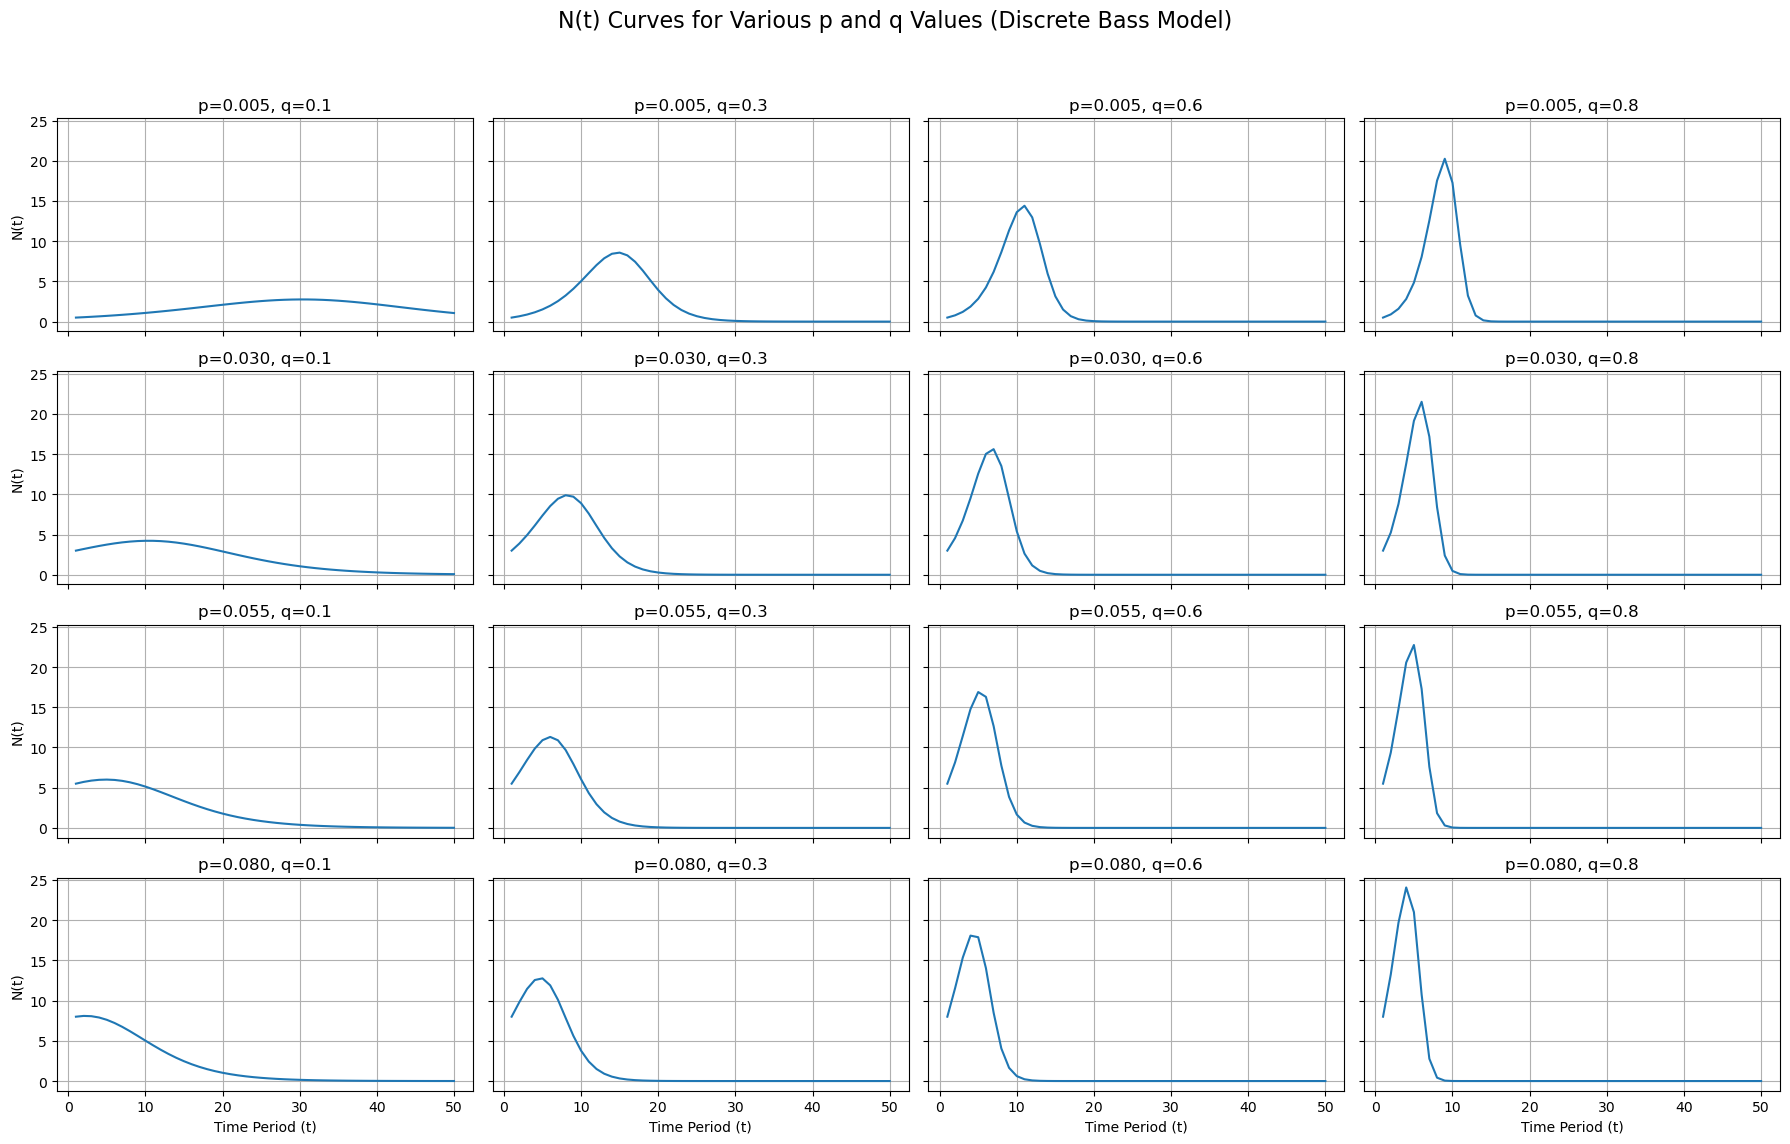

In [36]:
Tmax = 50
t_range = range(1, Tmax + 1)

def efficient_discrete_bass_model(M, p, q, Tmax):
    """
    Efficiently calculate N(t) for discrete time points using the Bass Model.
    Returns a list of N(t) values from t=1 to Tmax.
    """
    
    N_t = [p * M]  # Initial adoption is just p * M
    for t in range(2, Tmax + 1):
        prev_cumulative_adoption = sum(N_t)
        N_t.append((M - prev_cumulative_adoption) * (p + q * prev_cumulative_adoption / M))
    return N_t

# Redefine parameters
p_range = np.linspace(0.005, 0.08, 4)  # Broad range for p
q_range = np.linspace(0.1, 0.8, 4)  # Broad range for q

# Prepare the plots again with the efficient approach
fig, axes = plt.subplots(len(p_range), len(q_range), figsize=(18, 12), sharex=True, sharey=True)
for i, p in enumerate(p_range):
    for j, q in enumerate(q_range):
        N_t = efficient_discrete_bass_model(M, p, q, Tmax)
        axes[i, j].plot(t_range, N_t, label=f'p={p:.3f}, q={q:.1f}')
        axes[i, j].set_title(f'p={p:.3f}, q={q:.1f}')
        axes[i, j].grid(True)

# Set common labels and adjust layout
for ax in axes.flat:
    ax.set(xlabel='Time Period (t)', ylabel='N(t)')
    ax.label_outer()

fig.suptitle('N(t) Curves for Various p and q Values (Discrete Bass Model)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Question 3

Paste all the prompts into the ChatGPT 4.0, and below is the output:

In [37]:
from scipy.stats import uniform

# Function to add noise to the data
def add_noise(data, noise_level=0.1):
    """
    Adds uniform noise to the data.
    Noise level is given as a fraction of the data value (e.g., 0.1 for ±10% noise).
    """
    noisy_data = data * uniform.rvs(1 - noise_level, 1 + noise_level, size=len(data))
    return noisy_data

# Function to estimate p and q from noisy data using nonlinear optimization
def estimate_params_from_noisy_data(noisy_data, Tmax, M=100):
    """
    Estimates p and q from noisy N(t) data up to Tmax using nonlinear optimization.
    """
    # Optimization to minimize the Sum of Squared Errors (SSE) from noisy data
    result = minimize(sse, [0.01, 0.4], args=(range(1, Tmax + 1), noisy_data), method='L-BFGS-B', bounds=[(0, None), (0, None)])
    return result.x

# Function to forecast N(t) using estimated p and q
def forecast_Nt_from_estimated_params(p, q, N14, A14, Tmax, M=100):
    """
    Forecasts future N(t) values using the estimated p and q, starting from N14 and A14.
    """
    forecasted_Nt = [N14]
    for t in range(15, Tmax + 1):
        prev_adoption = A14 + sum(forecasted_Nt[1:] if len(forecasted_Nt) > 1 else [0])
        N_t = (M - prev_adoption) * (p + q * prev_adoption / M)
        forecasted_Nt.append(N_t)
    return forecasted_Nt

# Simulate for a set of p and q values
p_values = [0.01, 0.03]  # Example values for p
q_values = [0.3, 0.7]  # Example values for q

# For simplicity, use the efficient calculation of N(t) to generate true values
results = []

for p in p_values:
    for q in q_values:
        # Generate true N(t)
        true_Nt = efficient_discrete_bass_model(M, p, q, 14)
        # Add noise to N(t) for t=1 to 14
        noisy_Nt = add_noise(true_Nt)
        # Estimate p and q from noisy data
        estimated_p, estimated_q = estimate_params_from_noisy_data(noisy_Nt, 14)
        # Use estimated p and q to forecast N(15) to N(Tmax)
        N14 = noisy_Nt[-1]
        A14 = sum(noisy_Nt)
        forecasted_Nt = forecast_Nt_from_estimated_params(estimated_p, estimated_q, N14, A14, 50)
        results.append({
            "p": p,
            "q": q,
            "estimated_p": estimated_p,
            "estimated_q": estimated_q,
            "forecasted_Nt": forecasted_Nt
        })

# This step compiles the necessary functions and setups. Next, we'll analyze and plot the results to compare the forecasts with true values.
results


/var/folders/ng/hwxgpqq16t9_z0bkjjws2bj80000gn/T/ipykernel_64224/2754061247.py:10: RuntimeWarning: invalid value encountered in scalar divide
  part2 = 1 + q / p * np.exp(-(p + q) * t)
/var/folders/ng/hwxgpqq16t9_z0bkjjws2bj80000gn/T/ipykernel_64224/2754061247.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  part2 = 1 + q / p * np.exp(-(p + q) * t)


[{'p': 0.01,
  'q': 0.3,
  'estimated_p': 0.01,
  'estimated_q': 0.4,
  'forecasted_Nt': [14.58186554833172,
   1.3660157130725432,
   0.8361623241378981,
   0.5044642011914992,
   0.3016425675666931,
   0.17939347159278465,
   0.10634406562436063,
   0.06291898830302359,
   0.03718372875975712,
   0.02195987150230228,
   0.01296380964661281,
   0.007651255688798923,
   0.00451514917491945,
   0.002664254296438786,
   0.0015720201531306507,
   0.0009275302266209607,
   0.0005472561794102942,
   0.0003228857916683474,
   0.00019050423432465346,
   0.00011239806122094829,
   6.631505209232102e-05,
   3.912594895128066e-05,
   2.3084333630656387e-05,
   1.361976510697709e-05,
   8.035664288109475e-06,
   4.7410429350601745e-06,
   2.7972156770546354e-06,
   1.65035737309915e-06,
   9.737108911513228e-07,
   5.744894439966372e-07,
   3.389487754308892e-07,
   1.999797773498182e-07,
   1.1798806805088702e-07,
   6.961296139544512e-08,
   4.107165121319275e-08,
   2.4232271428797365e-08,
   

### Question 4

Paste all the prompts into the ChatGPT 4.0, and below is the output:

In [38]:
from sklearn.linear_model import LinearRegression

# Assuming the dataframe df contains the necessary data up to period 14
# and assuming M=100 as per the setup in Question Q1.2

# Compute A(t) and A(t)^2 for the regression model
df['A(t)'] = df['N_cumulative']
df['A(t)^2'] = df['A(t)'] ** 2

# Using data up to period 14 for fitting the model
df_fit = df[df['t'] <= 14]

# Defining predictors and response variable
X = df_fit[['A(t)', 'A(t)^2']]
# Adding the intercept manually
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = df_fit['N(t)']

# Linear regression
model = LinearRegression(fit_intercept=False)  # Intercept is manually added
model.fit(X, y)

# Coefficients
b_0, b_1, b_2 = model.coef_

# Compute p and q using the coefficients
M_fixed = 100
p_estimated = b_0 / M_fixed
q_estimated = b_1 + p_estimated

p_estimated, q_estimated

(0.0007824230009414671, 0.17653600746584477)